In [1]:
import matplotlib.pyplot as plt
import numpy  as np
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
num_steps = 70000
batch_size = 128
learning_rate = 0.0002

image_dim = 784
gen_hidden_dim = 256
disc_hidden_dim = 256
noise_dim = 100

def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

In [5]:
weights = {
    'gen_hidden1': tf.Variable(glorot_init([noise_dim, gen_hidden_dim])),
    'gen_out': tf.Variable(glorot_init([gen_hidden_dim, image_dim])),
    'disc_hidden1': tf.Variable(glorot_init([image_dim, disc_hidden_dim])),
    'disc_out': tf.Variable(glorot_init([disc_hidden_dim, 1])),
}
biases = {
    'gen_hidden1': tf.Variable(tf.zeros([gen_hidden_dim])),
    'gen_out': tf.Variable(tf.zeros([image_dim])),
    'disc_hidden1': tf.Variable(tf.zeros([disc_hidden_dim])),
    'disc_out': tf.Variable(tf.zeros([1])),
}

In [11]:
def generator(x):
    hidden_layer = tf.matmul(x, weights['gen_hidden1'])
    hidden_layer = tf.add(hidden_layer, biases['gen_hidden1'])
    hidden_layer = tf.nn.relu(hidden_layer)
    out_layer = tf.matmul(hidden_layer, weights['gen_out'])
    out_layer = tf.add(out_layer, biases['gen_out'])
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer

def discriminator(x):
    hidden_layer = tf.matmul(x, weights['disc_hidden1'])
    hidden_layer = tf.add(hidden_layer, biases['disc_hidden1'])
    hidden_layer = tf.nn.relu(hidden_layer)
    out_layer = tf.matmul(hidden_layer, weights['disc_out'])
    out_layer = tf.add(out_layer, biases['disc_out'])
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer

gen_input = tf.placeholder(tf.float32, shape=[None, noise_dim], name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dim], name='disc_input')

gen_sample = generator(gen_input)

disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample)

gen_loss = -tf.reduce_mean(tf.log(disc_fake))
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))

optimizer_gen = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer_disc = tf.train.AdamOptimizer(learning_rate=learning_rate)

gen_vars = [weights['gen_hidden1'], weights['gen_out'],
            biases['gen_hidden1'], biases['gen_out']]

disc_vars = [weights['disc_hidden1'], weights['disc_out'],
           biases['disc_hidden1'], biases['disc_out']]
    
train_gen = optimizer_gen.minimize(gen_loss, var_list=gen_vars)
train_disc = optimizer_disc.minimize(disc_loss, var_list=disc_vars)

init = tf.global_variables_initializer()

In [12]:
sess = tf.Session()

sess.run(init)

for i in range(1, num_steps+1):
    
    batch_x, _ = mnist.train.next_batch(batch_size)
    
    z = np.random.uniform(-1., 1., size=[batch_size, noise_dim])
    
    feed_dict = {disc_input: batch_x, gen_input:z}
    _, _, gl, dl = sess.run([train_gen, train_disc, gen_loss, disc_loss],
                           feed_dict=feed_dict)
    
    if i % 2000 == 0 or i == 1:
        print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (i, gl, dl))

Step 1: Generator Loss: 1.067574, Discriminator Loss: 1.339654
Step 2000: Generator Loss: 4.757660, Discriminator Loss: 0.025383
Step 4000: Generator Loss: 3.578325, Discriminator Loss: 0.145611
Step 6000: Generator Loss: 3.446482, Discriminator Loss: 0.201216
Step 8000: Generator Loss: 4.044057, Discriminator Loss: 0.169533
Step 10000: Generator Loss: 3.634518, Discriminator Loss: 0.238730
Step 12000: Generator Loss: 3.433539, Discriminator Loss: 0.215795
Step 14000: Generator Loss: 3.223790, Discriminator Loss: 0.302080
Step 16000: Generator Loss: 3.338311, Discriminator Loss: 0.262065
Step 18000: Generator Loss: 3.690632, Discriminator Loss: 0.234647
Step 20000: Generator Loss: 3.137983, Discriminator Loss: 0.318629
Step 22000: Generator Loss: 3.773463, Discriminator Loss: 0.243195
Step 24000: Generator Loss: 3.174602, Discriminator Loss: 0.329736
Step 26000: Generator Loss: 3.545813, Discriminator Loss: 0.529756
Step 28000: Generator Loss: 2.867740, Discriminator Loss: 0.443014
Ste

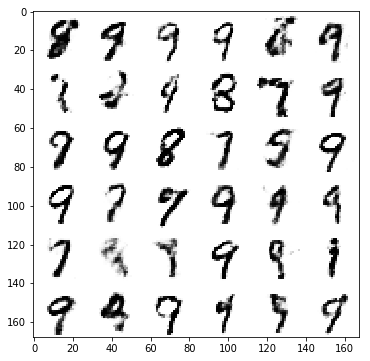

In [15]:
n = 6
canvas = np.empty((28 * n, 28 * n))
for i in range(n):
    z = np.random.uniform(-1., 1., size=[n, noise_dim])
    
    g = sess.run(gen_sample, feed_dict={gen_input: z})
    
    g = -1 * (g - 1)
    for j in range(n):
        canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28,28])             

plt.figure(figsize=(n, n))
plt.imshow(canvas, origin="upper", cmap="gray")
plt.show()